# Title


## Import Libraries and Data
See prepare-data.ipynb for detail on data prep

In [46]:
#import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import random
warnings.filterwarnings('ignore')
from datetime import datetime

In [47]:
# read in clean data
airbnb_data_dummies = pd.read_csv('./data/clean/cleaned-listings-dummies.csv')
airbnb_data_dummies_bio = pd.read_csv('./data/clean/cleaned-listings-dummies-bio.csv')
airbnb_data_basic = pd.read_csv('./data/clean/cleaned-listings-base.csv')

agg_pop_words = pd.read_csv('./output.csv')
agg_pop_words.rename(index=str, columns={"Unnamed: 0": "id", "0": "top_word_counts"} , inplace=True)


In [48]:
# drop nas
airbnb_data_dummies_bio = airbnb_data_dummies_bio.dropna()

In [49]:
# get counts for all words and phrases

# scores = pd.read_csv('./all_counts.csv')
# scores.rename(index=str, columns={"Unnamed: 0": "phrase", "0": "counts"} , inplace=True)
# scores.sort_values(by=['counts'], ascending=False, inplace=True)

# scores

In [50]:
# get counts for all phrase scores

# phrases_scores = pd.read_csv('./just-phrases.csv')
# phrases_scores.sort_values(by=['counts'], ascending=False, inplace=True)
# phrases_scores = phrases_scores[['phrase', 'counts']]

# phrases_scores

In [51]:
# list(airbnb_data_dummies_bio.columns.values)
# airbnb_data_dummies_bio.bio_score


In [52]:
# join top scores with full bio set

airbnb_data_dummies_bio = airbnb_data_dummies_bio.set_index('id')
agg_pop_words = agg_pop_words.set_index('id')

airbnb_data_dummies_bio = airbnb_data_dummies_bio.join(other=agg_pop_words, how='inner')

In [53]:
# airbnb_data_dummies_bio

In [54]:
# large formula
formula = 'price ~  top_word_counts + host_response_rate + accommodates + guests_included + bathrooms + bedrooms + beds + number_of_reviews + review_scores_rating + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_location + review_scores_value + description_score + bio_score + host_is_superhost + neighbourhood_Ballard  + neighbourhood_Cascade  + neighbourhood_Delridge + neighbourhood_Downtown + neighbourhood_Interbay + neighbourhood_Magnolia + neighbourhood_Northgate + property_type_Apartment  + property_type_Condominium + property_type_House + property_type_Loft + property_type_Townhouse + neighbourhood_Beacon_Hill + neighbourhood_Capitol_Hill + neighbourhood_Central_Area + neighbourhood_Lake_City + neighbourhood_Other_neighborhoods + neighbourhood_Queen_Anne + neighbourhood_Rainier_Valley + neighbourhood_Seward_Park + neighbourhood_University_District + neighbourhood_West_Seattle + property_type_Bed_Breakfast + room_type_Entire_home_apt + room_type_Private_room + room_type_Shared_room'
# fit ordinary least squares model
mod1 = smf.ols(formula=formula, data=airbnb_data_dummies_bio).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     100.8
Date:                Fri, 07 Dec 2018   Prob (F-statistic):               0.00
Time:                        23:15:39   Log-Likelihood:                -15677.
No. Observations:                2866   AIC:                         3.144e+04
Df Residuals:                    2824   BIC:                         3.169e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           -35.5708     19.575     -1.817      0.069     -73.954       2.813
top_word_counts                       9.0527      2.644      3.424      0.001       3.869      14.236
host_response_rate                   -0.2376      0.110     -2.167      0.030      -0.453      -0.023
accommodates                          6.9503      1.323      5.252      0.000       4.356       9.545
guests_included                       5.7429      1.006      5.707      0.000       3.770       7.716
bathrooms                            27.3152      2.450     11.148      0.000      22.511      32.120
bedrooms                             31.7573      2.355     13.487      0.000      27.140      36.374
beds                                  1.0224      1.966      0.520      0.603      -2.833       4.878
number_of_reviews                    -0.1442      0.029     -5.012      0.000      -0.201      -0.088
review_scores_rating                  0.9540      0.324      2.949      0.003       0.320       1.588
review_scores_accuracy                0.7092      2.347      0.302      0.763      -3.893       5.312
review_scores_cleanliness             3.1538      2.125      1.484      0.138      -1.014       7.321
review_scores_checkin                -0.8007      2.964     -0.270      0.787      -6.613       5.012
review_scores_communication           0.5589      3.144      0.178      0.859      -5.605       6.723
review_scores_location                3.6779      2.232      1.648      0.100      -0.699       8.055
review_scores_value                  -8.7883      2.337     -3.760      0.000     -13.371      -4.206
description_score                     8.3510      6.338      1.318      0.188      -4.076      20.778
bio_score                           -13.8562      6.208     -2.232      0.026     -26.028      -1.684
host_is_superhost                     7.1861      2.734      2.628      0.009       1.825      12.547
neighbourhood_Ballard                -8.4100      4.799     -1.752      0.080     -17.821       1.001
neighbourhood_Cascade                19.8340      7.721      2.569      0.010       4.694      34.974
neighbourhood_Delridge              -22.7923      7.345     -3.103      0.002     -37.195      -8.390
neighbourhood_Downtown               29.9616      3.970      7.547      0.000      22.177      37.746
neighbourhood_Interbay                5.1206     19.480      0.263      0.793     -33.076      43.317
neighbourhood_Magnolia               17.6791      8.896      1.987      0.047       0.236      35.122
neighbourhood_Northgate             -24.7364      7.640     -3.238      0.001     -39.718      -9.755
property_type_Apartment             -14.2125      4.412     -3.222      0.001     -22.863      -5.562
property_type_Condomini

Text(0.5, 1.0, 'Sentiment Score vs. Price')

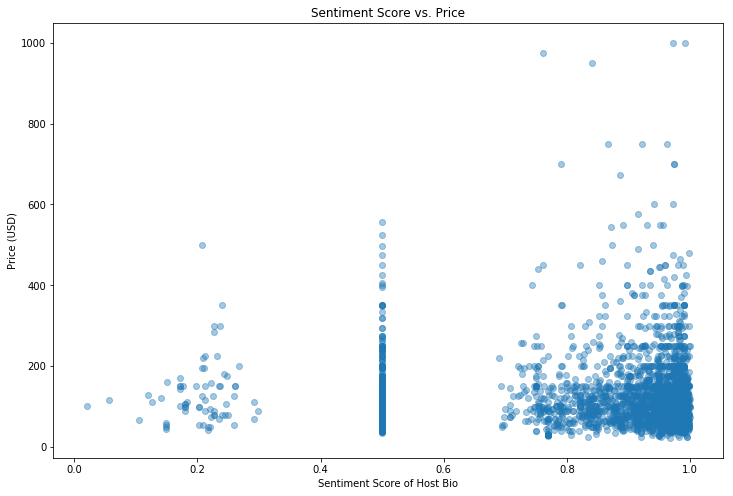

In [55]:
plt.figure(figsize=(12,8))
plt.scatter(airbnb_data_dummies_bio['bio_score'], airbnb_data_dummies_bio['price'], alpha = .4)
plt.xlabel('Sentiment Score of Host Bio')
plt.ylabel('Price (USD)')
plt.title('Sentiment Score vs. Price')

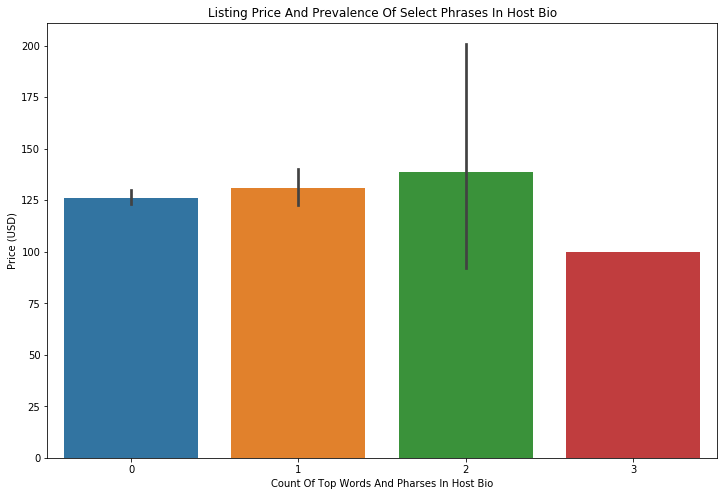

In [56]:
plt.figure(figsize=(12,8))

top_words_barplot = sns.barplot(x="top_word_counts", y="price", data=airbnb_data_dummies_bio)

top_words_barplot.set(xlabel='Count Of Top Words And Pharses In Host Bio', ylabel='Price (USD)',
                      title='Listing Price And Prevalence Of Select Phrases In Host Bio')

top_words_barplot